# Weighted Coauthor Networks Analysis, from 2001 to 2005.

### Imports

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

from collections import Counter
from tqdm import tqdm

%matplotlib inline

path_to_nets = '../../datasets/coauthors_networks/network_weight/'

g = None

### Coauthor Network - 2001

In [2]:
with open(path_to_nets + '2001', 'r') as edge_list:
    g = nx.read_weighted_edgelist(edge_list, delimiter=',', 
                                   create_using=nx.Graph, nodetype=str)

### Statistics

In [3]:
nodes_number = g.number_of_nodes()
edges_number = g.number_of_edges()
density = nx.density(g)
avg_clustering_coefficient = nx.average_clustering(g, weight='weight')
transitivity = nx.transitivity(g)
eccentricity, diameter, radius = None, None, None

try:
    eccentricity = nx.eccentricity(g)
    diameter = nx.diameter(g, e=eccentricity)
    radius = nx.radius(g, e=eccentricity)
except:
    eccentricity, diameter, radius = np.Inf, np.Inf, np.Inf

In [4]:
statistics = pd.DataFrame(
    {'Nodes': np.format_float_scientific(nodes_number, 2), 
     'Edges': np.format_float_scientific(edges_number, 2),
    'Density': np.format_float_scientific(density, 2), 
    'AVG Clustering Coefficient': np.format_float_scientific(
        avg_clustering_coefficient, 2),
    'Transitivity': np.format_float_scientific(transitivity, 2),
    'Eccentricity': eccentricity, 'Diameter': diameter, 'Radius': radius}, 
    index=[0])

statistics

,Nodes,Edges,Density,AVG Clustering Coefficient,Transitivity,Eccentricity,Diameter,Radius
0,1.33e+06,9.91e+05,1.13e-06,0.e+00,0.e+00,inf,inf,inf


### Degrees' Distribution and Probability's Density

In [5]:
degrees = sorted([d for n, d in g.degree(weight='weight')])

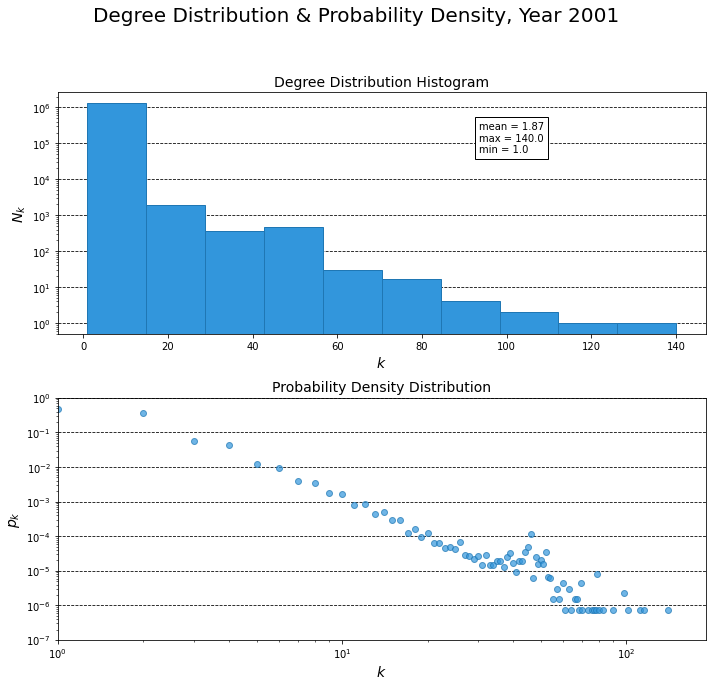

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

fig.suptitle('Degree Distribution & Probability Density, Year 2001', 
             fontsize=20)

axs[0].hist(degrees, log=True, zorder=2, color='#3296dc', edgecolor='#1f77b4')
axs[0].set_title('Degree Distribution Histogram', fontsize=14)
axs[0].set_xlabel(r'$k$', fontsize=14)
axs[0].set_ylabel(r'$N_k$', fontsize=14)
axs[0].grid(axis='y', linestyle='--', color='black', zorder=1)
axs[0].text(0.65, 0.75, 'mean = {}\nmax = {}\nmin = {}'
        .format(round(np.mean(degrees), 2), max(degrees), min(degrees)), 
        bbox=dict(facecolor='white', edgecolor='black'), 
        transform=axs[0].transAxes)

c, countdict_pdf = Counter(degrees), dict()
    
for deg in np.arange(min(degrees), max(degrees) + 1):
    countdict_pdf[deg] = (c[deg] / len(degrees)) if deg in c.keys() else 0.

axs[1].scatter(list(countdict_pdf.keys()), list(countdict_pdf.values()),
           zorder=2, alpha=0.7,color='#3296dc', edgecolor='#1f77b4')
axs[1].set_title('Probability Density Distribution', fontsize=14)
axs[1].set_xscale('log')
axs[1].set_xlim(min(countdict_pdf.keys()), max(countdict_pdf.keys()) + 50)
axs[1].set_yscale('log')
axs[1].set_ylim(1e-7, 1.)
axs[1].set_xlabel(r'$k$', fontsize=14)
axs[1].set_ylabel(r'$p_k$', fontsize=14)
axs[1].grid(axis='y', linestyle='--', color='black', zorder=1)

fig.tight_layout(rect=[0, 0.03, 1, 0.90])

### Weights' Distribution and Probability's Density

In [7]:
weights = sorted([edge[-1]['weight'] for edge in g.edges(data=True)])

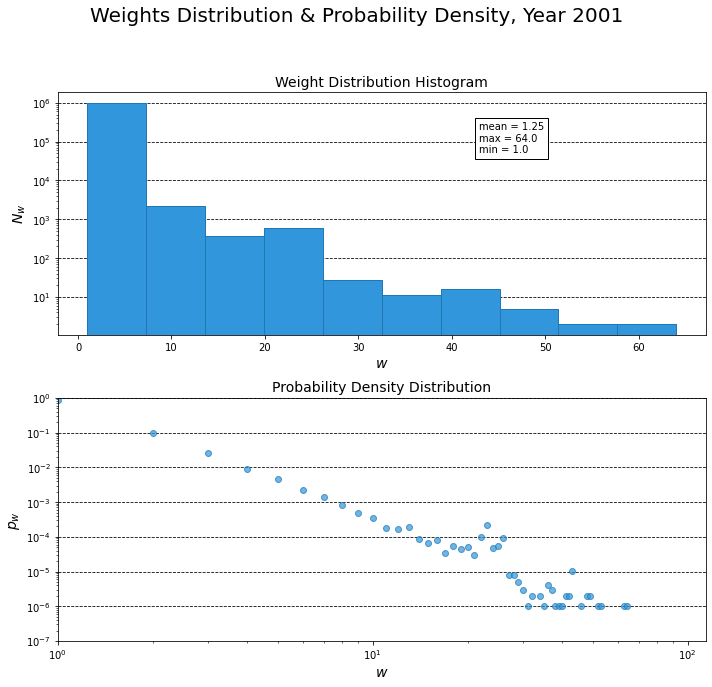

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

fig.suptitle('Weights Distribution & Probability Density, Year 2001', 
             fontsize=20)

axs[0].hist(weights, log=True, zorder=2, color='#3296dc', edgecolor='#1f77b4')
axs[0].set_title('Weight Distribution Histogram', fontsize=14)
axs[0].set_xlabel(r'$w$', fontsize=14)
axs[0].set_ylabel(r'$N_w$', fontsize=14)
axs[0].grid(axis='y', linestyle='--', color='black', zorder=1)
axs[0].text(0.65, 0.75, 'mean = {}\nmax = {}\nmin = {}'
        .format(round(np.mean(weights), 2), max(weights), min(weights)), 
        bbox=dict(facecolor='white', edgecolor='black'), 
        transform=axs[0].transAxes)

c, countdict_pdf = Counter(weights), dict()
    
for weight in np.arange(min(weights), max(weights) + 1):
    countdict_pdf[weight] = (c[weight] / len(weights)) if weight in c.keys() else 0.

axs[1].scatter(list(countdict_pdf.keys()), list(countdict_pdf.values()),
           zorder=2, alpha=0.7,color='#3296dc', edgecolor='#1f77b4')
axs[1].set_title('Probability Density Distribution', fontsize=14)
axs[1].set_xscale('log')
axs[1].set_xlim(min(countdict_pdf.keys()), max(countdict_pdf.keys()) + 50)
axs[1].set_yscale('log')
axs[1].set_ylim(1e-7, 1.)
axs[1].set_xlabel(r'$w$', fontsize=14)
axs[1].set_ylabel(r'$p_w$', fontsize=14)
axs[1].grid(axis='y', linestyle='--', color='black', zorder=1)

fig.tight_layout(rect=[0, 0.03, 1, 0.90])

### Degree Centrality

In [9]:
degree_centrality = sorted([v for k, v in nx.degree_centrality(g).items()])

Text(0.65, 0.75, 'mean = 1.13e-06\nmax = 1.66e-05\nmin = 7.54e-07')

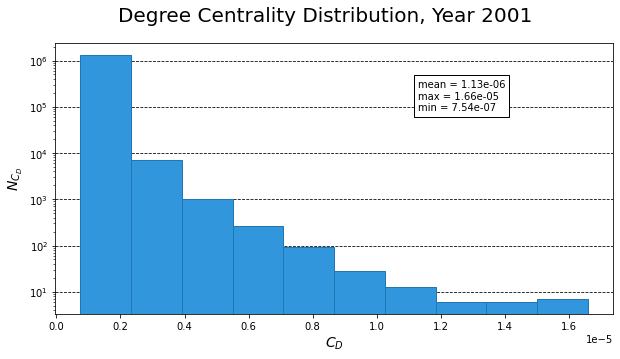

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

fig.suptitle('Degree Centrality Distribution, Year 2001', fontsize=20)

axs.hist(degree_centrality, log=True, zorder=2, color='#3296dc', 
         edgecolor='#1f77b4')
axs.set_xlabel(r'$C_D$', fontsize=14)
axs.set_ylabel(r'$N_{C_D}$', fontsize=14)
axs.grid(axis='y', linestyle='--', color='black', zorder=1)
axs.text(0.65, 0.75, 'mean = {}\nmax = {}\nmin = {}'
        .format(np.format_float_scientific(np.mean(degree_centrality), 2), 
                np.format_float_scientific(max(degree_centrality), 2), 
                np.format_float_scientific(min(degree_centrality), 2)), 
        bbox=dict(facecolor='white', edgecolor='black'), 
        transform=axs.transAxes)

### Closeness Centrality

In [11]:
closeness_centrality = sorted([v for k, v in nx.closeness_centrality(g).items()])

Text(0.65, 0.75, 'mean = 1.54e-06\nmax = 2.19e-05\nmin = 0.e+00')

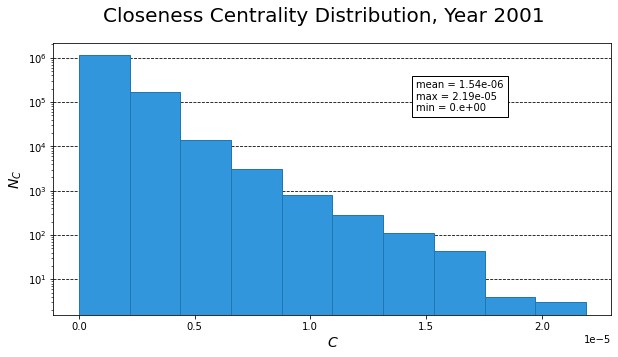

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

fig.suptitle('Closeness Centrality Distribution, Year 2001', fontsize=20)

axs.hist(closeness_centrality, log=True, zorder=2, color='#3296dc', 
         edgecolor='#1f77b4')
axs.set_xlabel(r'$C$', fontsize=14)
axs.set_ylabel(r'$N_{C}$', fontsize=14)
axs.grid(axis='y', linestyle='--', color='black', zorder=1)
axs.text(0.65, 0.75, 'mean = {}\nmax = {}\nmin = {}'
        .format(np.format_float_scientific(np.mean(closeness_centrality), 2), 
                np.format_float_scientific(max(closeness_centrality), 2), 
                np.format_float_scientific(min(closeness_centrality), 2)), 
        bbox=dict(facecolor='white', edgecolor='black'), 
        transform=axs.transAxes)

### Betweenness Centrality

In [15]:
betweenness_centrality = sorted(
    [v for k, v in nx.betweenness_centrality(g, k=10, weight='weight').items()]
)

Text(0.65, 0.75, 'mean = 3.86e-12\nmax = 6.78e-07\nmin = 0.e+00')

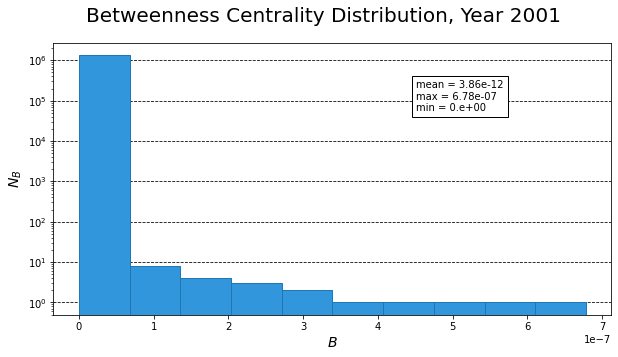

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

fig.suptitle('Betweenness Centrality Distribution, Year 2001', fontsize=20)

axs.hist(betweenness_centrality, log=True, zorder=2, color='#3296dc', 
         edgecolor='#1f77b4')
axs.set_xlabel(r'$B$', fontsize=14)
axs.set_ylabel(r'$N_{B}$', fontsize=14)
axs.grid(axis='y', linestyle='--', color='black', zorder=1)
axs.text(0.65, 0.75, 'mean = {}\nmax = {}\nmin = {}'
        .format(np.format_float_scientific(np.mean(betweenness_centrality), 2), 
                np.format_float_scientific(max(betweenness_centrality), 2), 
                np.format_float_scientific(min(betweenness_centrality), 2)), 
        bbox=dict(facecolor='white', edgecolor='black'), 
        transform=axs.transAxes)